# 02-Homework
The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [3]:
!wget $data

--2025-10-08 17:42:52--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.008s  

2025-10-08 17:42:52 (110 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [5]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


# Preparing Dataset
Use only the following columns:

    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'


In [6]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [18]:
features = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

In [19]:
df = df[features]

In [20]:
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [21]:
'''
Question 1
There's one column with missing values. What is it?

    'engine_displacement'
    'horsepower'
    'vehicle_weight'
    'model_year'
'''

"\nQuestion 1\nThere's one column with missing values. What is it?\n\n    'engine_displacement'\n    'horsepower'\n    'vehicle_weight'\n    'model_year'\n"

In [22]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [23]:
cols_with_missing = df.columns[df.isnull().any()]
print(cols_with_missing)

Index(['horsepower'], dtype='object')


# EDA

    Look at the fuel_efficiency_mpg variable. Does it have a long tail?

In [24]:
df.shape

(9704, 5)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

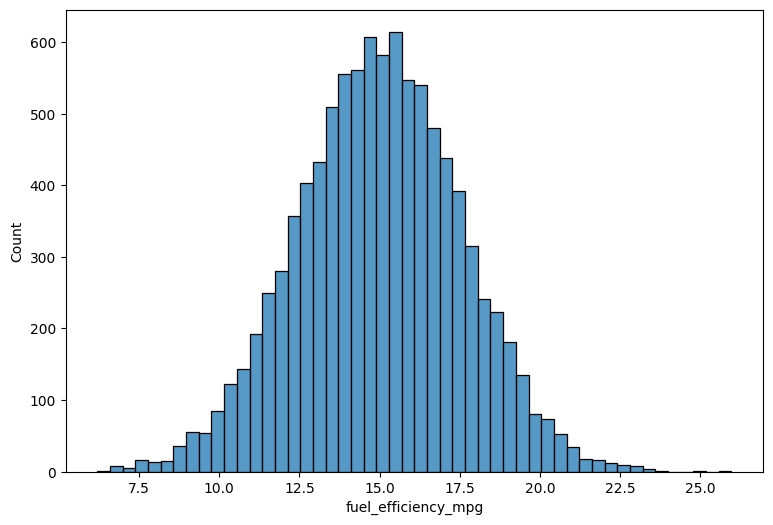

In [26]:
plt.figure(figsize=(9, 6))
sns.histplot(df.fuel_efficiency_mpg, bins = 50)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

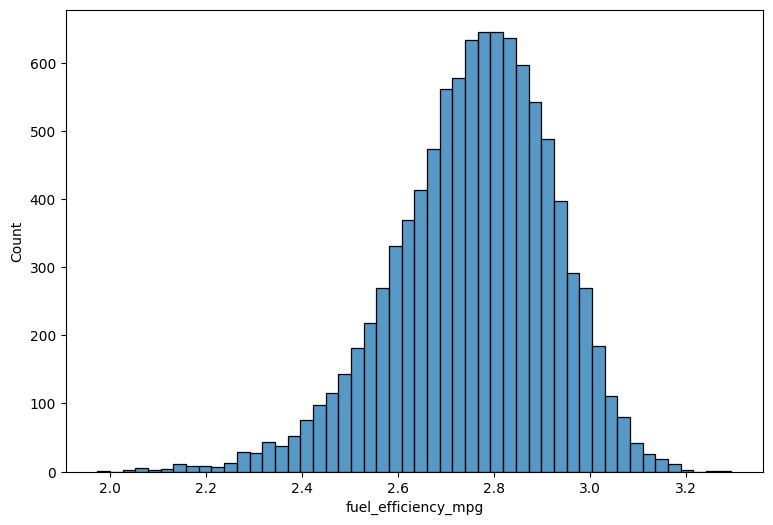

In [31]:
log_fuel_efficiency_mpg = np.log1p(df.fuel_efficiency_mpg)
plt.figure(figsize=(9, 6))
sns.histplot(log_fuel_efficiency_mpg, bins = 50)

# Question 2

What's the median (50% percentile) for variable 'horsepower'?

    49
    99
    149
    199

In [32]:
median_horsepower = df['horsepower'].median()
print(median_horsepower)

149.0


# Prepare and split the dataset

    Shuffle the dataset (the filtered one you created above), use seed 42.
    Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [47]:
np.random.seed(42)

In [48]:
n = len(df)
print(n)

9704


In [49]:
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

n_train, n_val, n_test

(5824, 1940, 1940)

In [50]:
n_train + n_val + n_test

9704

In [51]:
idx = np.arange(n)

In [52]:
idx

array([   0,    1,    2, ..., 9701, 9702, 9703], shape=(9704,))

In [53]:
np.random.shuffle(idx)

In [54]:
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [55]:
df_shuffled = df.iloc[idx]

In [56]:
df_shuffled.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [57]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [62]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [63]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [64]:
y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

In [65]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [66]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [67]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006


In [68]:
y_train

array([2.8703359 , 2.85061269, 2.97511223, ..., 2.92279789, 2.99201277,
       2.94261017], shape=(5824,))

# Question 3

    We need to deal with missing values for the column from Q1.
    We have two options: fill it with 0 or with the mean of this variable.
    Try both options. For each, train a linear regression model without regularization using the code from the lessons.
    For computing the mean, use the training only!
    Use the validation dataset to evaluate the models and compare the RMSE of each option.
    Round the RMSE scores to 2 decimal digits using round(score, 2)
    Which option gives better RMSE?

Options:

    With 0
    With mean
    Both are equally good


In [69]:
base = list(df_train.columns.values)
base

['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [72]:
def prepare_X(df, value=0):
    df_num = df[base]
    df_num = df_num.fillna(value)
    X = df_num.values
    return X

In [73]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [75]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)



In [76]:
# First, try to fill missing values with zeros.
df_train.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [77]:
X_train = prepare_X(df_train, 0)

In [81]:
w_0, w = train_linear_regression(X_train, y_train)

In [83]:
X_val = prepare_X(df_val, 0)
y_pred = w_0 + X_val.dot(w)

In [88]:
error_zero = rmse(y_val, y_pred)

In [89]:
round(error_zero, 2)

np.float64(0.04)

In [90]:
# Now try to find rmse with mean values
mean_val = df_train['horsepower'].mean()

In [91]:
mean_val

np.float64(149.54476367006487)

In [92]:
X_train = prepare_X(df_train, mean_val)
w_0, w = train_linear_regression(X_train, y_train)

In [94]:
X_val = prepare_X(df_val, mean_val)
y_pred = w_0 + X_val.dot(w)
score_mean = rmse(y_val, y_pred)
round(score_mean, 2)

np.float64(0.04)

Answer : Both are equally good

# Question 4

    Now let's train a regularized linear regression.
    For this question, fill the NAs with 0.
    Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
    Use RMSE to evaluate the model on the validation dataset.
    Round the RMSE scores to 2 decimal digits.
    Which r gives the best RMSE?

If multiple options give the same best RMSE, select the smallest r.

Options:

    0
    0.01
    1
    10
    100


In [95]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [96]:
scores = {}
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    scores[r] = round(score, 2)
    
    print(f'r={r}: w0={w0}, rmse={score}')

r=0: w0=3.6646662472218297, rmse=0.03997925782374439
r=0.01: w0=3.1688134470074534, rmse=0.03997787201684389
r=0.1: w0=1.4288369989383432, rmse=0.04050873984529611
r=1: w0=0.22012861946726972, rmse=0.04135385150821747
r=5: w0=0.04624885656570121, rmse=0.04150611823271757
r=10: w0=0.023271722731248758, rmse=0.041526801237522025
r=100: w0=0.0023413689852701753, rmse=0.04154575656081135


In [97]:
scores

{0: np.float64(0.04),
 0.01: np.float64(0.04),
 0.1: np.float64(0.04),
 1: np.float64(0.04),
 5: np.float64(0.04),
 10: np.float64(0.04),
 100: np.float64(0.04)}

r=0 gives best RMSE

# Question 5

    We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
    Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
    For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    Fill the missing values with 0 and train a model without regularization.
    For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
    What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
    Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

    0.001
    0.006
    0.060
    0.600

    Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.


In [103]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [106]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []
for seed in seeds:
    idx = np.arange(n)
    np.random.seed(seed=seed)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
    y_test = np.log1p(df_test.fuel_efficiency_mpg.values)
    
    del df_train['fuel_efficiency_mpg'], df_val['fuel_efficiency_mpg'], df_test['fuel_efficiency_mpg']
    
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(f'seed={seed}: w0={w0}, rmse={score}')
    scores.append(score)

std = np.std(scores)
print(f'std = {round(std, 3)}')

seed=0: w0=3.5840552002665245, rmse=0.03801775537087802
seed=1: w0=3.802370265133959, rmse=0.0392788533393729
seed=2: w0=3.4836343845344357, rmse=0.039446530525595505
seed=3: w0=3.657951656449596, rmse=0.0387276370388226
seed=4: w0=3.5304453062056993, rmse=0.03727535850105433
seed=5: w0=3.489796183072592, rmse=0.039384388339929154
seed=6: w0=3.440222584817519, rmse=0.03890763931346167
seed=7: w0=3.606243552753437, rmse=0.038379716269399816
seed=8: w0=3.4845126366830237, rmse=0.040189869753460644
seed=9: w0=3.593421326834908, rmse=0.038607646441269794
std = 0.001


# Question 6

    Split the dataset like previously, use seed 9.
    Combine train and validation datasets.
    Fill the missing values with 0 and train a model with r=0.001.
    What's the RMSE on the test dataset?

Options:

    0.15
    0.515
    5.15
    51.5


In [117]:
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)
    
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
    
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
    
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)
    
del df_train['fuel_efficiency_mpg'], df_val['fuel_efficiency_mpg'], df_test['fuel_efficiency_mpg']

In [118]:
df_full_train = pd.concat([df_train, df_val])

In [119]:
df_full_train = df_full_train.reset_index(drop=True)

In [120]:
X_full_train = prepare_X(df_full_train, 0)

In [121]:
y_full_train = np.concatenate([y_train, y_val])

In [122]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [123]:
X_test = prepare_X(df_test, 0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print(f'RMSE_test = {round(score, 2)}')

RMSE_test = 0.04


In [124]:
score

np.float64(0.039196136444546614)